## Nerve Conduction Velocity
Due to Guillain-Barré syndrome (GBS) the nerve conduction velocity of a person might be affected: Now we are going to use a dataset which contain the records of the time a electrical signal takes to travel along the forearm of a patient from the elbow to the wrist. 

In [130]:
# importing the basic python poackages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
def nerve_conduction_velocity(times, forearm_length):
    print(forearm_length[:, np.newaxis].shape)
    vel = (forearm_length[:, np.newaxis] / 100) / (times / 1000)
    vel_mean = np.mean(vel, axis = 1)
    vel_std = np.std(vel, axis = 1)
    return vel_mean, vel_std
    

In [132]:
# Dummy data of person forearm length and the stimulus consuction time
measurements = {
    'p1': {'forearm': 45., 'times': np.array([9.7, 9.8, 10.1]) },
    'p2': {'forearm': 47., 'times': np.array([14.2, 12.4, 13.6]) },
    'p3': {'forearm': 50., 'times': np.array([8. , 8.3, 8.2]) },
    'p4': {'forearm': 48., 'times': np.array([10.2,  8. , 10.6]) },
}

measurements = pd.DataFrame(measurements).T
measurements

,forearm,times
p1,45.0,"[9.7, 9.8, 10.1]"
p2,47.0,"[14.2, 12.4, 13.6]"
p3,50.0,"[8.0, 8.3, 8.2]"
p4,48.0,"[10.2, 8.0, 10.6]"


In [133]:
times = np.vstack(measurements.times.values) # transfore 1d array to 2d array
forearms = np.array(measurements.forearm.tolist())
print(times)
print(type(forearms))

[[ 9.7  9.8 10.1]
 [14.2 12.4 13.6]
 [ 8.   8.3  8.2]
 [10.2  8.  10.6]]
<class 'numpy.ndarray'>


In [134]:
# Finding out the nerve_conduction_velocity from the sample datas
vel_mean, vel_std = nerve_conduction_velocity(times, forearms)

measurements['vel_mean'] = vel_mean
measurements['vel_std'] = vel_std

measurements

(4, 1)


,forearm,times,vel_mean,vel_std
p1,45.0,"[9.7, 9.8, 10.1]",45.621525,0.778889
p2,47.0,"[14.2, 12.4, 13.6]",35.186880,2.011131
p3,50.0,"[8.0, 8.3, 8.2]",61.238858,0.940846
p4,48.0,"[10.2, 8.0, 10.6]",50.780614,6.559277


In [135]:
# finding out the abnormal nerve conduction velocity
measurements['normal'] = measurements.vel_mean.between(45, 70)
measurements

,forearm,times,vel_mean,vel_std,normal
p1,45.0,"[9.7, 9.8, 10.1]",45.621525,0.778889,True
p2,47.0,"[14.2, 12.4, 13.6]",35.186880,2.011131,False
p3,50.0,"[8.0, 8.3, 8.2]",61.238858,0.940846,True
p4,48.0,"[10.2, 8.0, 10.6]",50.780614,6.559277,True


## Data visualization

In [146]:
# signal1 contain the gait signal from an IMU sensors attached to the shoe
ds1 = pd.read_csv('./data/signal1.csv', header=0, index_col = 0)
ds1.head()
s1_sampling_rate = 204.8
ds1.index /= s1_sampling_rate
ds1.index -= ds1.index[0] 
ds1.index.name = 'time [s]'
ds1.head()

,gyr_x,gyr_y,gyr_z,acc_x,acc_y,acc_z
time [s],,,,,,
0.000000,-50.537109,362.854004,-25.817871,0.250000,-0.332031,2.442871
0.004883,-55.847168,352.783203,-36.010742,0.249512,-0.270508,2.516602
0.009766,-60.302734,341.552734,-44.921875,0.306641,-0.209961,2.681152
0.014648,-58.410645,330.017090,-52.246094,0.321777,-0.140625,2.857910
0.019531,-55.114746,322.082520,-58.715820,0.296387,-0.079590,2.981934


In [148]:
ds2 = pd.read_csv('./data/signal2.txt', header=None)
s2_sampling_time = 0.48 # ms
ds2.index *= s2_sampling_time / 1000
ds2.index.name = 'time [s]'
ds2.head()

,0
time [s],
0.00000,-1478.8
0.00048,-1478.8
0.00096,-1478.8
0.00144,-1478.8
0.00192,-1478.8


In [150]:
import h5py
h5_object = h5py.File('./data/signal3.h5', 'r')
ds3 = h5_object['trial1/muscles/tibialis'][()]
ds3 = pd.DataFrame(ds3)

s3_sampling_rate = h5_object['trial1/muscles/tibialis'].attrs['sampling rate']
ds3.index /= s3_sampling_rate

ds3.index.name = 'time [s]'
ds3.head()

,0
time [s],
0.0000,0.177917
0.0005,0.172958
0.0010,0.194855
0.0015,0.211258
0.0020,0.183716


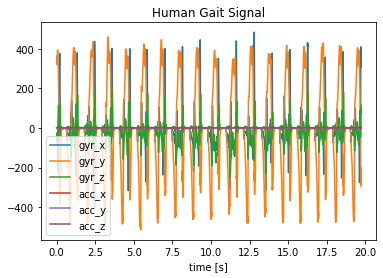

In [151]:
ds1.plot()
plt.title('Human Gait Signal');

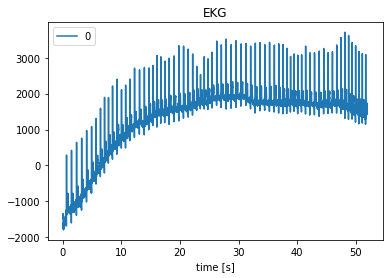

In [152]:
ds2.plot()
plt.title('EKG');

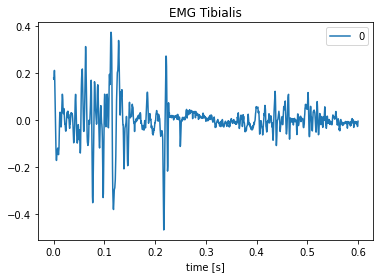

In [153]:
ds3.plot()
plt.title('EMG Tibialis');